In [17]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modcods.util.modulation as md
import modcods.util.maee as maee

from pyreport import PlotUtil

np.random.seed(seed=11231512)

In [18]:
transmitters = pd.read_excel('transmitters.xlsx')

transmitters['link_eff'] = transmitters['datarate_Mbps'] / transmitters['dc_power_W']
#transmitters['link_eff'] = transmitters['datarate_Mbps'] / transmitters['dc_power_W']
rf_eff = 0.3
transmitters['mod_power_W'] = transmitters['dc_power_W'] - (transmitters['rf_power_W'] / rf_eff)

print(transmitters)

      Unnamed: 0  bandwidth_MHz  datarate_Mbps  rf_power_W  dc_power_W  \
0  Astro Digital          86.40         320.60         0.6        20.0   
1      Swift-KTX         500.00         100.00         2.0        25.0   
2          ISARA            NaN            NaN         0.5        10.0   
3            NSS            NaN          10.00         2.0        30.0   
4           HDS2         600.00        1674.00         2.0        50.0   
5           HODO         125.00         538.00         2.0        22.0   
6           IRIS           8.44           6.25         3.8        33.7   
7          XLINK         475.00          25.00         0.5        15.0   
8         PULSAR         300.00          50.00         2.0        15.0   
9        NanoCom         500.00         225.00         3.0        28.5   

   size_U  mass_kg   link_eff  mod_power_W  
0    1.00     1.00  16.030000    18.000000  
1    0.33     0.50   4.000000    18.333333  
2    0.50     0.19        NaN     8.333333  
3    

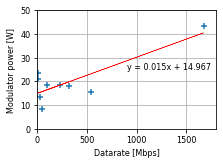

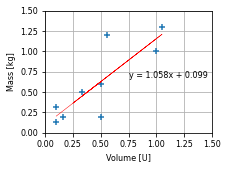

In [21]:
# Plot datarate vs mod power
sel = ~transmitters['datarate_Mbps'].isnull()

fig, ax = plt.subplots()
ax.scatter(transmitters['datarate_Mbps'], transmitters['mod_power_W'], marker='+')
ax.set_ylim((0, 50))
ax.set_xlim((0, 1800))
ax.grid()

z = np.polyfit(transmitters[sel]['datarate_Mbps'], transmitters[sel]['mod_power_W'], 1)
p = np.poly1d(z)
ax.plot(transmitters['datarate_Mbps'].values,p(transmitters['datarate_Mbps'].values),"r-", linewidth=0.5)
ax.text(0.5, 0.5, 'y = %.3fx + %.3f' % (z[0], z[1]), transform=ax.transAxes, fontsize=8)
ax.set_xlabel('Datarate [Mbps]')
ax.set_ylabel('Modulator power [W]')
#ax.scatter(55, 9.23, s=50, color='tab:green', marker='x')

PlotUtil.apply_report_formatting()
plt.tight_layout()

fig.savefig('D:/git/thesis_report_ae/figures/transmitters_mod_efficiency.pdf')

# Plot volume vs mass
sel = ~transmitters['mass_kg'].isnull()

fig, ax = plt.subplots()
ax.scatter(transmitters['size_U'], transmitters['mass_kg'], marker='+')
ax.set_ylim((0, 1.5))
ax.set_xlim((0, 1.5))
ax.grid()

z = np.polyfit(transmitters[sel]['size_U'], transmitters[sel]['mass_kg'], 1)
p = np.poly1d(z)
ax.plot(transmitters['size_U'].values,p(transmitters['size_U'].values),"r-", linewidth=0.5)
ax.text(0.5, 0.45, 'y = %.3fx + %.3f' % (z[0], z[1]), transform=ax.transAxes, fontsize=8)
ax.set_xlabel('Volume [U]')
ax.set_ylabel('Mass [kg]')

PlotUtil.apply_report_formatting()
plt.tight_layout()
fig.savefig('D:/git/thesis_report_ae/figures/transmitters_mass.pdf')

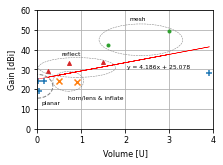

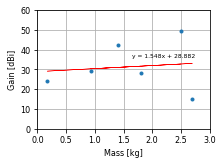

In [20]:
antennas = pd.read_excel('antennas.xlsx')

#print(antennas)

# Plot mass vs volume
fig, ax = plt.subplots()

from matplotlib.patches import Ellipse

# Planar
sel = antennas['Type'].str.contains('Planar')
sel = sel & ~antennas['Volume\n[U]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
ax.scatter(antennas[sel]['Volume\n[U]'], antennas[sel]['Gain\n[dBi]'], marker='+')
ellipse = Ellipse(xy=(0, 21.5), width=0.7, height=12, ls='--',
                        edgecolor='tab:grey', fc='None', lw=1)
ax.add_patch(ellipse)
ax.text(0.1, 12.5, 'planar', fontsize=6)

# Horn & inflate
sel = antennas['Type'].str.contains('Horn') | antennas['Type'].str.contains('Lens') | antennas['Type'].str.contains('Inflate')
sel = sel & ~antennas['Volume\n[U]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
ax.scatter(antennas[sel]['Volume\n[U]'], antennas[sel]['Gain\n[dBi]'], marker='x')
ellipse = Ellipse(xy=(0.7, 24), width=0.7, height=10, ls='--',
                        edgecolor='tab:grey', fc='None', lw=.5)
ax.add_patch(ellipse)
ax.text(0.7, 15, 'horn/lens & inflate', fontsize=6)

# Mesh
sel = antennas['Type'].str.contains('Mesh')
sel = sel & ~antennas['Volume\n[U]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
ax.scatter(antennas[sel]['Volume\n[U]'], antennas[sel]['Gain\n[dBi]'], marker='.')
ellipse = Ellipse(xy=(2.35, 45), width=1.9, height=16, ls='--',
                        edgecolor='tab:grey', fc='None', lw=.5)
ax.add_patch(ellipse)
ax.text(2.1, 55, 'mesh', fontsize=6)

# Reflect
sel = antennas['Type'].str.contains('Reflect')
sel = sel & ~antennas['Volume\n[U]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
ax.scatter(antennas[sel]['Volume\n[U]'], antennas[sel]['Gain\n[dBi]'], 15, marker='^',)
ellipse = Ellipse(xy=(0.9, 31), width=1.75, height=10, ls='--',
                        edgecolor='tab:grey', fc='None', lw=.5)
ax.add_patch(ellipse)
ax.text(0.55, 37, 'reflect', fontsize=6)

ax.set_ylim((0, 60))
ax.set_xlim((0, 4.0))

# Plot trend
sel = ~antennas['Volume\n[U]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
z = np.polyfit(antennas[sel]['Volume\n[U]'].astype('float').values, antennas[sel]['Gain\n[dBi]'].values, 1)
p = np.poly1d(z)
ax.plot(antennas[sel]['Volume\n[U]'].astype('float').values,p(antennas[sel]['Volume\n[U]'].astype('float').values),"r-", linewidth=0.5)
ax.text(0.51, 0.51, 'y = %.3fx + %.3f' % (z[0], z[1]), transform=ax.transAxes, fontsize=6)

ax.set_xlabel('Volume [U]')
ax.set_ylabel('Gain [dBi]')
ax.grid()

PlotUtil.apply_report_formatting()
plt.tight_layout()

fig.savefig('D:/git/thesis_report_ae/figures/antennas_gain_vs_volume.pdf')

# Plot gain vs mass
fig, ax = plt.subplots()

sel = ~antennas['Mass\n[kg]'].str.contains('\?', na=False) & ~antennas['Gain\n[dBi]'].isnull()
ax.scatter(antennas[sel]['Mass\n[kg]'], antennas[sel]['Gain\n[dBi]'], marker='.',)

# Plot trend
z = np.polyfit(antennas[sel]['Mass\n[kg]'].astype('float').values, antennas[sel]['Gain\n[dBi]'].values, 1)
p = np.poly1d(z)
ax.plot(antennas[sel]['Mass\n[kg]'].astype('float').values,p(antennas[sel]['Mass\n[kg]'].astype('float').values),"r-", linewidth=0.5)
ax.text(0.55, 0.60, 'y = %.3fx + %.3f' % (z[0], z[1]), transform=ax.transAxes, fontsize=6)

ax.set_ylim((0, 60))
ax.set_xlim((0, 3.0))

ax.set_xlabel('Mass [kg]')
ax.set_ylabel('Gain [dBi]')
ax.grid()

PlotUtil.apply_report_formatting()
plt.tight_layout()

fig.savefig('D:/git/thesis_report_ae/figures/antennas_gain_vs_mass.pdf')
